In [74]:
# Our basic Imports 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

In [75]:
# Loading the data 

# for more insight go here 
# https://scikit-learn.org/0.19/datasets/olivetti_faces.html

# Dataset consists of 400 Images of 40 unique persons (10 Images each)
# our task is to predict the person Id i.e its respective target looking at Image 
# you can kinda call face recognition 
# but face recogniton includes processes like facial landmarks , getting 128bit facial embedding using Inception network and comparing them distance wise 
# High level things , but you'll get there eventually :-)

train = fetch_olivetti_faces()

In [76]:
# Getting the features and targets 

X = train.data
Y = train.target

In [77]:
# Looking at shape , before tryna do anything 

print(X.shape)
print(Y.shape)

(400, 4096)
(400,)


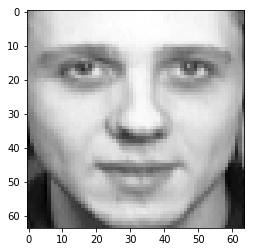

In [78]:
# Visualizing a random Image from dataset

plt.imshow(X[np.random.choice(len(X))].reshape(64,64) , cmap = "gray")

In [79]:
# If you could see , the values of pixels are already between 0 and 1 ,
# So you don't need to do X = 1/255.0 * X 

print(X[np.random.choice(len(X))])

[0.1322314  0.07438017 0.09917355 ... 0.3677686  0.40495867 0.41735536]


In [80]:
!pip install keras 

You are using pip version 18.0, however version 19.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [81]:
# As we need to predict from 0 - 40 , this is not a binary classification ( 0 - 1 ) 
# we cannot use sigmoid , we need to use softmax 
# learn more about softmax from here 
# https://en.wikipedia.org/wiki/Softmax_function

# we need to convert Y into indicator values before sending it into our network 
# for example if Y[0] = 1 , then at position 1 it'll be 1 and rest all it'll be 0 ==> [0 1 0 .......... 0] 

from keras.utils import to_categorical

Y = to_categorical(Y)

print(Y.shape)

(400, 40)


In [82]:
# Now lets split the Training and Testing set 
# I'll take 360 Images for Training and 40 Images for Testing

from sklearn.model_selection import train_test_split

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.1 , random_state = 1)

print(" <======= Training Dimensions ========> ")
print(Xtrain.shape , Ytrain.shape)
print(" <======= Testing Dimensions ========> ")
print(Xtest.shape , Ytest.shape)

 <======= Training Dimensions ========> 
(360, 4096) (360, 40)
 <======= Testing Dimensions ========> 
(40, 4096) (40, 40)


In [83]:
# Now lets create a model i.e .. , A basic Neural network 

# 256 Neurons on out input layer , expecting 4096 shape input
# Relu activation works well while back propagation , since its gradient is 1 

# Here for more insight 
# https://en.wikipedia.org/wiki/Rectifier_(neural_networks)

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=256, input_dim = X.shape[1]))
model.add(Activation('relu'))
model.add(Dense(units=512))
model.add(Activation('relu'))
model.add(Dense(units=128))
model.add(Activation('relu'))
model.add(Dense(units=40))
model.add(Activation('softmax'))

print(model.summary())

# Adam (Type of Gradient Descent) is an optimizer which almost converges better than gradient descent 

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

r = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=100, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 256)               1048832   
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               131584    
_________________________________________________________________
activation_15 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               65664     
_________________________________________________________________
activation_16 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 40)                5160      
__________

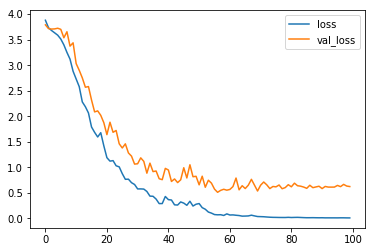

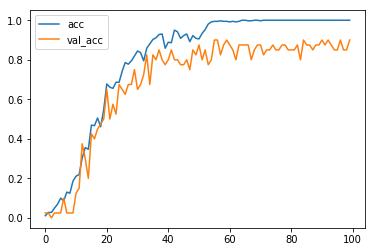

In [84]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [85]:
# Okay , the accuracies doesn't seem so great , what can we do to improve the Accuracy ??
# Normalizing the data 
# adding dropout layers (if weights over learn)

def get_normalized_data(Xtrain , Ytrain , Xtest , Ytest):
    print("Reading in and transforming data...")
    
    mu = Xtrain.mean(axis=0)
    std = Xtrain.std(axis=0)
    
    np.place(std, std == 0, 1)
    
    Xtrain = (Xtrain - mu) / std
    Xtest = (Xtest - mu) / std
    
    return Xtrain, Xtest , Ytrain, Ytest

Xtrain , Xtest , Ytrain , Ytest = get_normalized_data(Xtrain , Ytrain , Xtest , Ytest)

Reading in and transforming data...


In [86]:
from keras.layers import Dropout

model = Sequential()

model.add(Dense(units=256, input_dim = X.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(units=512))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(units=128))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(units=40))
model.add(Activation('softmax'))

print(model.summary())

# Adam (Type of Gradient Descent) is an optimizer which almost converges better than gradient descent 

model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

r = model.fit(Xtrain, Ytrain, validation_data=(Xtest, Ytest), epochs=100, batch_size=32)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               1048832   
_________________________________________________________________
activation_18 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               131584    
_________________________________________________________________
activation_19 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               65664     
__________

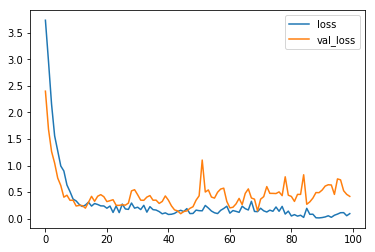

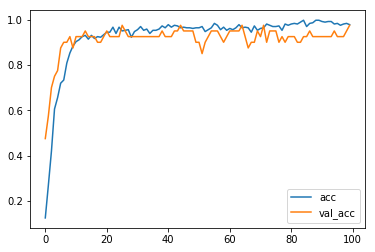

In [87]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()
plt.show()

In [88]:
# Looks more stable and reliable , Isn't 
# If you like my notebook , please like share and comment on LinkedIn
# I really appreciate and respect your feedback !!

# THANK YOU !!!!!